# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 4</span>

### Exercise 04.1

The NSL_SIMULATOR code we have provided compute the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, and the temperature, $T$.

<span style="color:red">Include the calculation of the pressure, $P$, inside your Molecular Dynamics code: block averages, progressive average values and progressive uncertainties.</span>

Remember that, via the **virial theorem**, the pressure in a Lennard-Jones system can be estimated by means of:

$$ P = \rho k_B \langle T \rangle + \frac{1}{3V} \left\langle \sum_{i=1}^{N-1} \sum_{j\,(>i)}^N 48\epsilon \left[ \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^{12} - 
\frac{1}{2} \left(\frac{\sigma}{|\vec{r}_i -\vec{r}_j|}\right)^6 \right] \right\rangle $$

In [89]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import shutil

phase = ["solid", "liquid","gas"]

def plotConfig(fileName,elevation,azimuth):
    fig = plt.figure(figsize=(10,8))
    X, Y, Z = np.loadtxt(fileName,usecols=(1,2,3), skiprows=2, unpack=True)
    ax = fig.add_subplot(121, projection='3d',proj_type='ortho')
    ax.scatter(X, Y, Z, c='blue', marker='.',s=100)
    ax.view_init(elev=elevation, azim=azimuth)
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    bound=0.5
    ax.set_xlim(-bound,bound)
    ax.set_ylim(-bound,bound)
    ax.set_zlim(-bound,bound)
    #plot()
    plt.show()

In [56]:
# stampa le condizioni iniziali
# in modo leggibile
cartellaInput='../NSL_SIMULATOR/INPUT/'

def printInput(fileDiInput):
    lines = fileDiInput.split('\n')[:9]
    for line in lines:
        print(line)

# imposta le condizioni iniziali relative 
# alla fase (solido, liquido, gas)
# e la configurazione iniziale, che può essere di fcc
# o piuttosto di fase equilibrata.

def setInitialConfig(fase,initialConfig,\
                     Nblocchi,LStepBlocco,cartellaMadre):
    with open(cartellaInput+\
              "INPUT_EXAMPLES/input."+fase, "r") as file:
        input_content = file.read()
    customInput=input_content.\
        replace('20\nNSTEPS                 2000', \
                str(Nblocchi)+'\nNSTEPS                 '+\
                str(LStepBlocco))
    with open(cartellaInput+"input.dat", "w") as file:
        file.write(customInput)
        
    shutil.copyfile(initialConfig, cartellaInput+'CONFIG/config.xyz')
    fccTrue='fcc'
    if(not initialConfig==cartellaInput+'CONFIG/config.fcc'):
        fccTrue='equilibrio'
    print("HO IMPOSTATO LA CONFIGURAZIONE INIZIALE"+'\n'+
          fase+' '+fccTrue+' con')
    printInput(customInput)
    plotConfig(cartellaInput+'CONFIG/config.xyz',0,0)

In [93]:
import subprocess
import os
import shutil


def runSimulation(fase, cartella_origine):
    os.chdir('../NSL_SIMULATOR/SOURCE/')
    subprocess.run('./simulator.exe')
    os.chdir('../')
    destination_dir='../4-MolecularDynamics_NVE/'\
                    +cartella_origine+fase
    shutil.rmtree(destination_dir, ignore_errors=True)
    shutil.copytree('OUTPUT',destination_dir )
    print('HO OTTENUTO LA CONFIGURAZIONE FINALE\n'+
          fase)
    os.chdir('../4-MolecularDynamics_NVE')
    plotConfig(cartella_origine+fase+'/CONFIG/config.xyz',0,0)
    
    
def plotData(cartella_origine, maxRows):
    Teq = [ 0.4, 0.55, 1.42]
    for i in range (0,3) :
        x, temp, temp_prog, temperr_prog = \
            np.loadtxt(cartella_origine+phase[i]+"/temperature.dat",\
            max_rows=maxRows,  skiprows=1, unpack=True)
        plt.figure(figsize=(15,7))
        plt.plot(x,temp, color='orange', label="Temperatura")
        plt.axhline(y=Teq[i], color ="r", label = "Target temperature: "+str(Teq[i]))
        plt.title(phase[i],fontsize=25)
        plt.xlabel('Passi',fontsize=15)
        plt.ylabel('Temperatura',fontsize=15)
        plt.legend(fontsize=20)
        plt.grid(True)
        plt.show()

### <span style="color:green"> Equilibration is needed!</span>

By monitoring the temperature, $T$, during the first time steps of the simulation, you will observe that at the beginning, starting from a perfect crystalline configuration, $T$ will not conserve its value. Can you understand and explain this behaviour?

Explore and find the starting value of $T$ needed to stabilize, after a certain number of time steps (equilibration time), the average value of $T$ on the desired $T^\star$. <span style="color:red">Perform your solid/liquid/gas phase MD simulations by re-starting them after such equilibration time.</span>

HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
solid fcc con
SIMULATION_TYPE        0
RESTART                0
TEMP                   0.8
NPART                  108
RHO                    1.1
R_CUT                  2.2
DELTA                  0.0005
NBLOCKS                20000
NSTEPS                 1


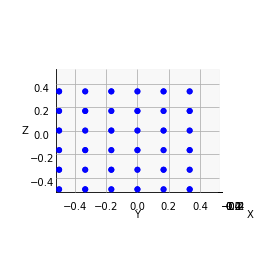

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 99 %
solid


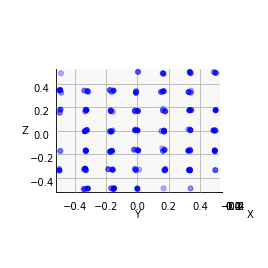

HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
liquid fcc con
SIMULATION_TYPE        0
RESTART                0
TEMP                   1.1
NPART                  108
RHO                    0.8
R_CUT                  2.5
DELTA                  0.0005
NBLOCKS                20000
NSTEPS                 1


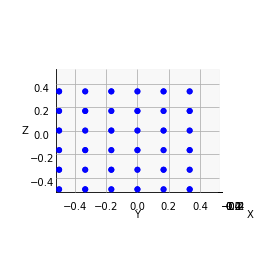

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 99 %
liquid


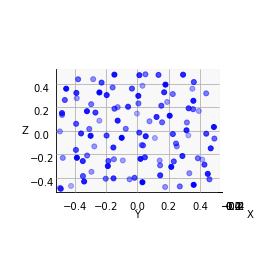

HO IMPOSTATO LA CONFIGURAZIONE INIZIALE
gas fcc con
SIMULATION_TYPE        0
RESTART                0
TEMP                   1.2
NPART                  108
RHO                    0.05
R_CUT                  5.0
DELTA                  0.0005
NBLOCKS                20000
NSTEPS                 1


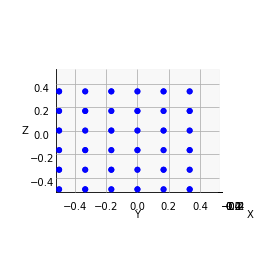

HO OTTENUTO LA CONFIGURAZIONE FINALE==== ] 99 %
gas


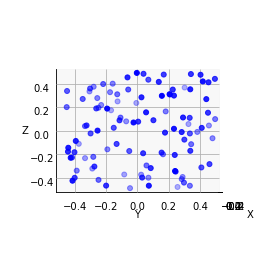

In [85]:
#Equilibrazione:
for i in range (0,3) :
    setInitialConfig(phase[i],cartellaInput+'CONFIG/config.fcc',20000,1,'equilibrazione/')
    runSimulation(phase[i],'equilibrazione/')

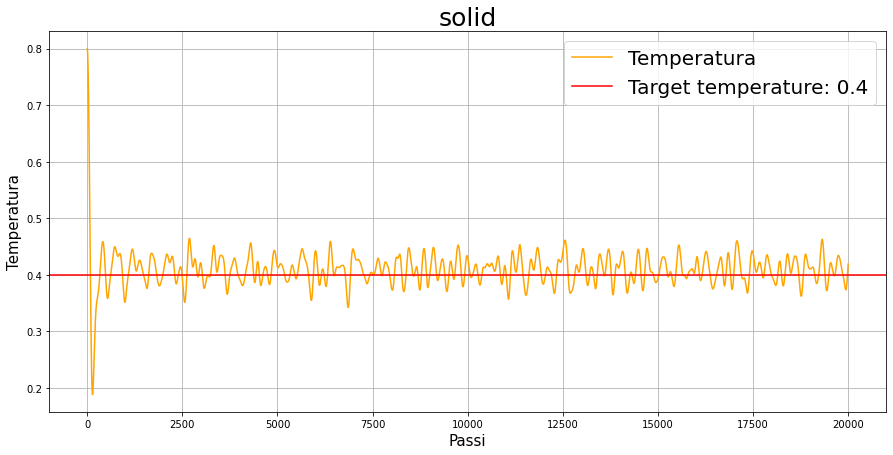

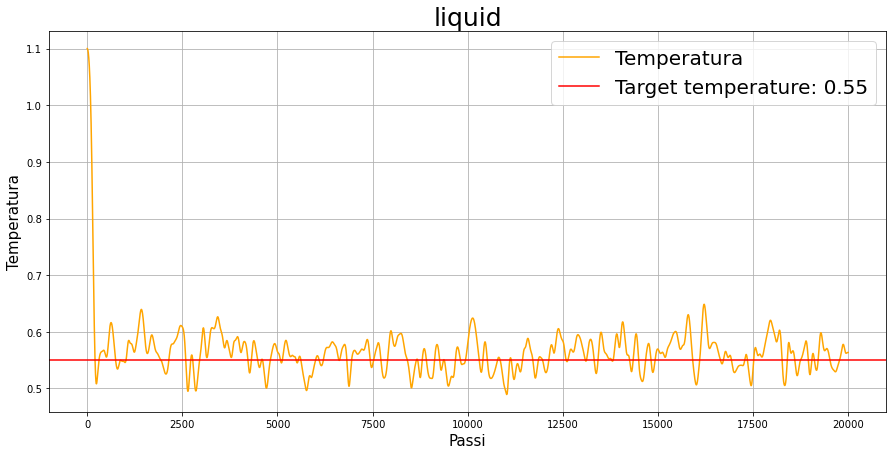

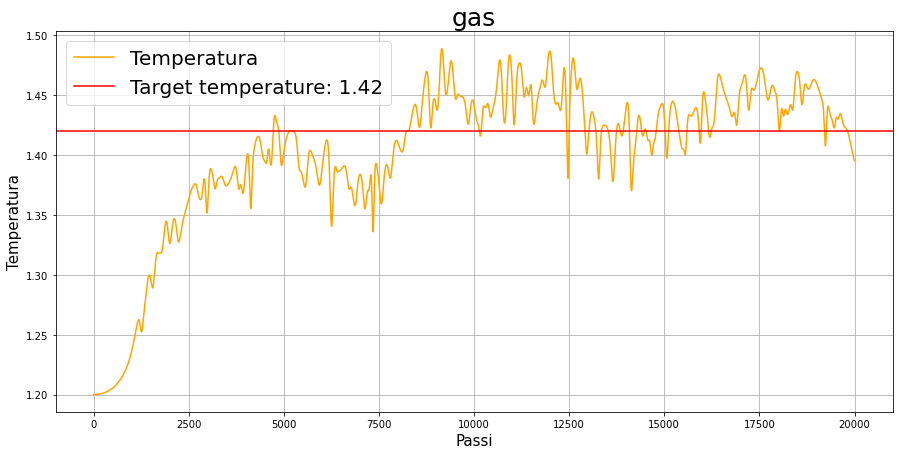

In [94]:
plotData('equilibrazione/',20000)

Si trova dunque:

| fase     | Solido   | Liquido  | Gas   |
|----------|----------|----------|-------|
|  $kT$     | 0.4      | 0.55     | 1.42  |





### Exercise 04.2

By means of your upgraded code, <span style="color:red">perform MD simulations via a Lennard-Jones model</span> of Argon ($\sigma = 0.34$ nm, $\epsilon/k_B = 120$ K, $m=39.948$ amu) in the following conditions:
1. solid phase: $\rho^\star = 1.1$, $T^\star = 0.8$ (cut-off radius: $r_c = 2.2$)
2. liquid phase: $\rho^\star = 0.8$, $T^\star = 1.1$ (cut-off radius: $r_c = 2.5$)
3. gas phase: $\rho^\star = 0.05$, $T^\star = 1.2$ (cut-off radius: $r_c = 5.0$)

and show in pictures the obtained progressive average values and uncertainties as a functions of the increasing number of blocks for the total (internal) energy per particle, $E/N$, the potential energy per particle, $U/N$, the kinetic energy per particle, $K/N$, the temperature, $T$, and the pressure, $P$, in reduced units!

### Exercise 07.3

<span style="color:red">Include the calculation of the radial distribution function, $g(r)$, as a function of the radial distance $r$ among particles, with $r \in \left[ 0; L/2\right]$ inside the NSL simulator code</span>: average value of $g(r)$ in each block, final average value of $g(r)$ with statistical uncertainties in a separate file.